# Notebook analyzing WhatsApp chat data

In [1]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import re

# NLTK stopwords download
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/andilejaden/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Load and clean the chats

In [2]:
df = pd.read_csv('../datasets/whatsapp_chat_with_prie.csv')

In [3]:
# Stripping off any leading/trailing spaces from the column headers
df.columns = df.columns.str.strip()

In [4]:
# Stripping spaces from the Date column
df['Date'] = df['Date'].str.strip()

In [5]:
# Converting 'Date' and 'Time' columns to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce')
df['Time'] = pd.to_datetime(df['Time'].str.strip(), format='%H:%M:%S', errors='coerce').dt.time

In [6]:
# Dropping rows with NaT in 'Date' or NaT in 'Time'
df.dropna(subset=['Date', 'Time'], inplace=True)

## 1. Comparison of messages sent between two participants

In [7]:
participant1 = 'Prie♥️'  
participant2 = 'Google Jr' 

participant1_messages = df[df['Sender'] == participant1]
participant2_messages = df[df['Sender'] == participant2]

participant1_message_count = len(participant1_messages)
participant2_message_count = len(participant2_messages)

print(f"\nComparison of messages sent between {participant1} and {participant2}:")
print(f"{participant1}: {participant1_message_count} messages")
print(f"{participant2}: {participant2_message_count} messages")


Comparison of messages sent between Prie♥️ and Google Jr:
Prie♥️: 697 messages
Google Jr: 550 messages


## 2. Day with most messages

In [8]:
most_active_day = df['Date'].value_counts().idxmax()
print("\nDay with the most activity:", most_active_day.date())


Day with the most activity: 2023-12-21


# 3. Most active time during the day

In [9]:
df['Hour'] = df['Time'].apply(lambda x: x.hour)
most_active_time = df['Hour'].value_counts().idxmax()
print("\nMost active time during the day:", most_active_time, ":00")


Most active time during the day: 8 :00


## 4. Commonly used words

In [10]:
stop_words = set(stopwords.words('english'))
def preprocess_message(message):
    message = re.sub(r'[^\w\s]', '', message).lower()
    return message

## Combining all messages into a single string

In [11]:
all_messages = ' '.join(df['Message'].apply(preprocess_message))

In [12]:
# Tokenizing the string into words. Magic happens here!
words = all_messages.split()

In [13]:
# Removing stopwords
words = [word for word in words if word not in stop_words]

In [14]:
# Counting the frequency of each word using built-in Counter for efficiency
word_freq = Counter(words)

# Get the 20 most common words. You can filter out some words if needed e.g. yes, no, ok, etc.
most_common_words = word_freq.most_common(20)
print("\nMost Commonly Used Words:")
for word, freq in most_common_words:
    print(f"{word}: {freq}")


Most Commonly Used Words:
babe: 231
im: 105
love: 81
good: 47
thank: 45
ill: 41
dont: 32
know: 31
get: 29
yeah: 28
yes: 27
sthandwa: 27
morning: 26
one: 24
much: 23
well: 23
ok: 22
thats: 22
yaz: 21
n: 21


## Plotting the participants

/Users/andilejaden/Workspace/data/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9829 (\N{BLACK HEART SUIT}) missing from font(s) Lucida Grande.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/andilejaden/Workspace/data/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Lucida Grande.
  fig.canvas.print_figure(bytes_io, **kw)


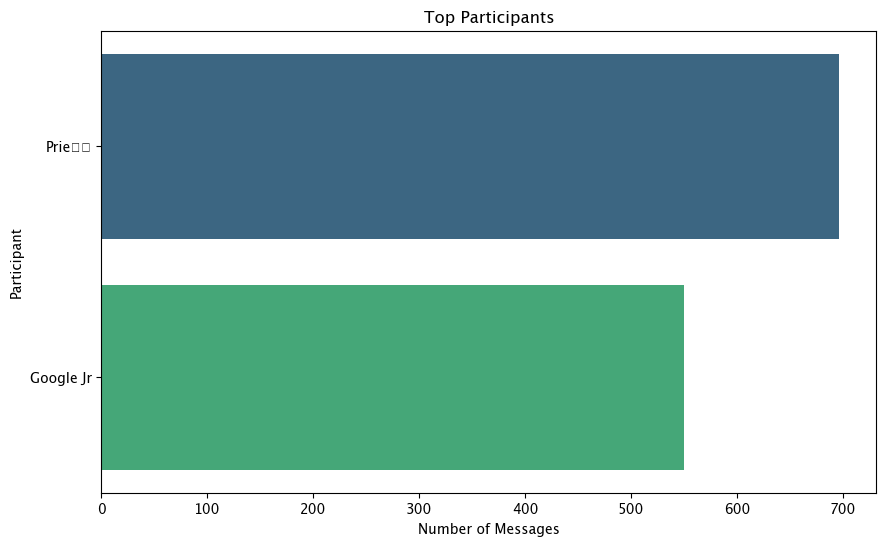

In [15]:
top_participants = df['Sender'].value_counts().nlargest(2)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_participants.values, y=top_participants.index, palette='viridis', hue=top_participants.index)
plt.title('Top Participants')
plt.xlabel('Number of Messages')
plt.ylabel('Participant')
plt.show()

## Message count by hour

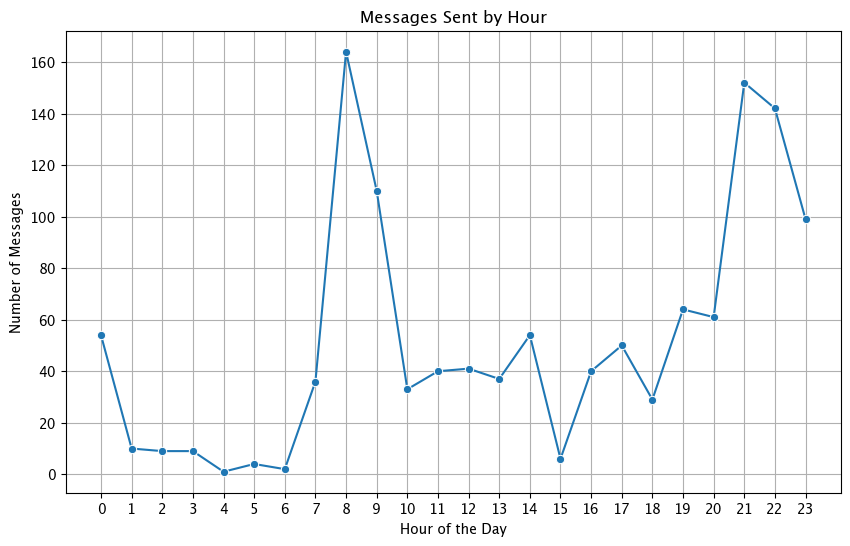

In [16]:
hourly_counts = df['Hour'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x=hourly_counts.index, y=hourly_counts.values, marker='o')
plt.title('Messages Sent by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Messages')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

## Generate a word cloud

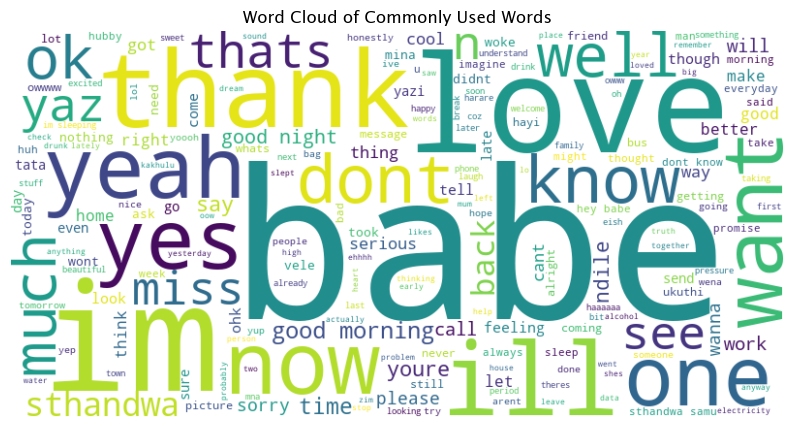

In [17]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_messages)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Commonly Used Words')
plt.show()